In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn import preprocessing

court_data = pd.read_csv('https://raw.githubusercontent.com/bparsazadeh/INF1344H_Final_Project_Rep/main/court_prep_2.csv')


court_df = pd.DataFrame(court_data)
court_df.head()

,Gender,Year,charge,court_d,prep_h
0,Female,2018,Attempt Murder,1,180.0
1,Female,2011,Attempt Murder,4,192.0
2,Female,2019,Attempt Murder,2,193.0
3,Male,2014,Attempt Murder,15,203.0
4,Female,2010,Attempt Murder,1,150.0


In [3]:
court_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Gender   1882 non-null   object 
 1   Year     1882 non-null   int64  
 2   charge   1882 non-null   object 
 3   court_d  1882 non-null   int64  
 4   prep_h   1882 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 73.6+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


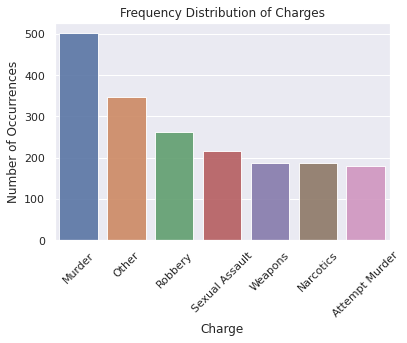

In [4]:
charge_count = court_df['charge'].value_counts()
sns.set(style="darkgrid")
sns.barplot(charge_count.index, charge_count.values, alpha=0.9)
plt.title('Frequency Distribution of Charges')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Charge', fontsize=12)

plt.xticks(rotation=45)
plt.show()

In [5]:
court_df.iloc[:, [2,3,4]]

,charge,court_d,prep_h
0,Attempt Murder,1,180.0
1,Attempt Murder,4,192.0
2,Attempt Murder,2,193.0
3,Attempt Murder,15,203.0
4,Attempt Murder,1,150.0
...,...,...,...
1877,Robbery,57,371.0
1878,Robbery,44,376.0
1879,Robbery,57,377.0
1880,Robbery,32,378.0


In [6]:
#Set independent and dependent variable 
#Charge
x = court_df.iloc[:, [3]].values
#Prep hours
y = court_df.iloc[:, [4]].values

In [7]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = regressor.predict(x_test)

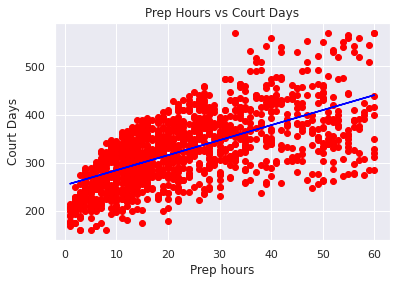

In [10]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train,regressor.predict(X_train), color = 'blue')
plt.title("Prep Hours vs Court Days")
plt.xlabel("Prep hours")
plt.ylabel("Court Days")
plt.show()

In [11]:
X = court_df[['charge','Gender']]
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,charge_Murder,charge_Narcotics,charge_Other,charge_Robbery,charge_Sexual Assault,charge_Weapons,Gender_Male,Gender_Unisex,Gender_Unknown
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0


In [12]:
Y = court_df['prep_h']
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1129, 9)
(753, 9)
(1129,)
(753,)


In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [15]:
# print the intercept
print(model.intercept_)

310.1952239512404


In [16]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
charge_Murder,72.567481
charge_Narcotics,21.893886
charge_Other,15.887407
charge_Robbery,-37.068702
charge_Sexual Assault,-10.251452
charge_Weapons,8.513574
Gender_Male,-1.184364
Gender_Unisex,-20.286813
Gender_Unknown,-19.871271


In [17]:
predictions = model.predict(X_test)
predictions

array([324.89826742, 309.01086031, 330.90474616, 311.80229689,
       305.79581816, 332.08910979, 382.76270511, 362.47589221,
       382.76270511, 332.08910979, 309.01086031, 332.08910979,
       326.08263106, 381.57834147, 317.52443453, 382.76270511,
       382.76270511, 381.57834147, 326.08263106, 299.94377242,
       299.94377242, 381.57834147, 382.76270511, 317.52443453,
       298.75940878, 309.01086031, 381.57834147, 298.75940878,
       310.19522395, 271.94215798, 324.89826742, 317.52443453,
       271.94215798, 324.89826742, 326.08263106, 317.52443453,
       326.08263106, 309.01086031, 330.90474616, 381.57834147,
       298.42198527, 310.19522395, 332.08910979, 330.90474616,
       273.12652162, 317.52443453, 310.19522395, 382.76270511,
       381.57834147, 324.89826742, 317.52443453, 332.08910979,
       271.94215798, 309.01086031, 271.94215798, 382.76270511,
       273.12652162, 381.57834147, 271.94215798, 382.76270511,
       382.76270511, 382.76270511, 290.32395328, 382.76

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


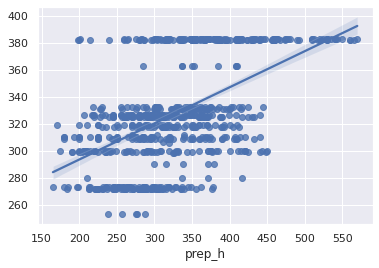

In [18]:
sns.regplot(y_test,predictions)

In [19]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                 prep_h   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     39.77
Date:                Sun, 05 Dec 2021   Prob (F-statistic):           9.34e-62
Time:                        22:36:58   Log-Likelihood:                -6312.4
No. Observations:                1129   AIC:                         1.264e+04
Df Residuals:                    1119   BIC:                         1.270e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   310.19